## 1. Import Thư Viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from IPython import display
from collections import defaultdict
# Thư viện cho Mô hình và Đánh giá
from K_Nearest_Neighbors import K_Nearest_Neighbors as KNN
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Nạp Dữ Liệu

In [2]:
# Load dữ liệu Iris
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Labels: 0=setosa, 1=versicolor, 2=virginica

# Tạo DataFrame để dễ xem
df = pd.DataFrame(X, columns=iris.feature_names)
df['class'] = pd.Categorical.from_codes(y, iris.target_names)

## 3. Khám Phá Dữ Liệu 

In [3]:
print("\n5 hàng đầu tiên của dữ liệu")
df.head()


5 hàng đầu tiên của dữ liệu


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
print("\n5 hàng cuối cùng của dữ liệu:")
df.tail()


5 hàng cuối cùng của dữ liệu:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
print("\n📊 Thông tin dữ liệu:")
print(f"- Số mẫu: {len(df)}")
print(f"- Số đặc trưng: {X.shape[1]}")
print(f"- Các lớp: {list(iris.target_names)}")
print("Tên các đặc trưng (features):", iris.feature_names)
print("Kích thước của X (features):", X.shape)
print("Kích thước của y (labels):", y.shape)

print("\nThông tin cấu trúc dữ liệu:")
df.info()


📊 Thông tin dữ liệu:
- Số mẫu: 150
- Số đặc trưng: 4
- Các lớp: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]
Tên các đặc trưng (features): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Kích thước của X (features): (150, 4)
Kích thước của y (labels): (150,)

Thông tin cấu trúc dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   class              150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


***Nhận Xét***
- Dữ liệu có 4 tính chất để phân lớp: sepal-length, sepal-width, petal-length, petal-width
- Giá trị 4 tính chất được tính cùng đơn vị đo (cm)
- Tổng số dòng dữ liệu là 150 dòng
- Dữ liệu để phân lớp ở cột class

In [6]:
print("\nThống kê mô tả các thuộc tính số:")
df.describe()


Thống kê mô tả các thuộc tính số:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


***Nhận Xét***
* 4 tính chất có cùng đơn vị đo (cm) nằm trong khoảng [0, 8]

In [7]:
print("\n📊 Phân bố các loài:")
df['class'].value_counts()


📊 Phân bố các loài:


class
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

***Nhận Xét***
* Dữ liệu cần phân loại 3 loài hoa Iris là Iris-virginica, Iris-setosa, và Iris-versicolor
* Các lớp là cân bằng nhau và có số lượng 50

In [8]:
print("\nKiểm tra giá trị thiếu:")
print(df.isnull().sum())


Kiểm tra giá trị thiếu:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64


***Nhận Xét***
* Không có giá trị thiếu ở 4 cột

In [9]:
print("\nKiểm tra giá trị trùng:")
n_duplicated = df.duplicated(keep = False).sum()
print(f'+ Số dòng trùng: {n_duplicated}')
display.display(df[df.duplicated(keep = False)])
if n_duplicated>0:
    print("+ Số dòng loại bỏ: %d"%(len(df[df.duplicated(keep = "first")])))
    display.display(df[df.duplicated(keep = "first")])


Kiểm tra giá trị trùng:
+ Số dòng trùng: 2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


+ Số dòng loại bỏ: 1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
142,5.8,2.7,5.1,1.9,virginica


***Nhận Xét***
* Dữ liệu có 1 dòng bị trùng là dòng ở vị trí 142

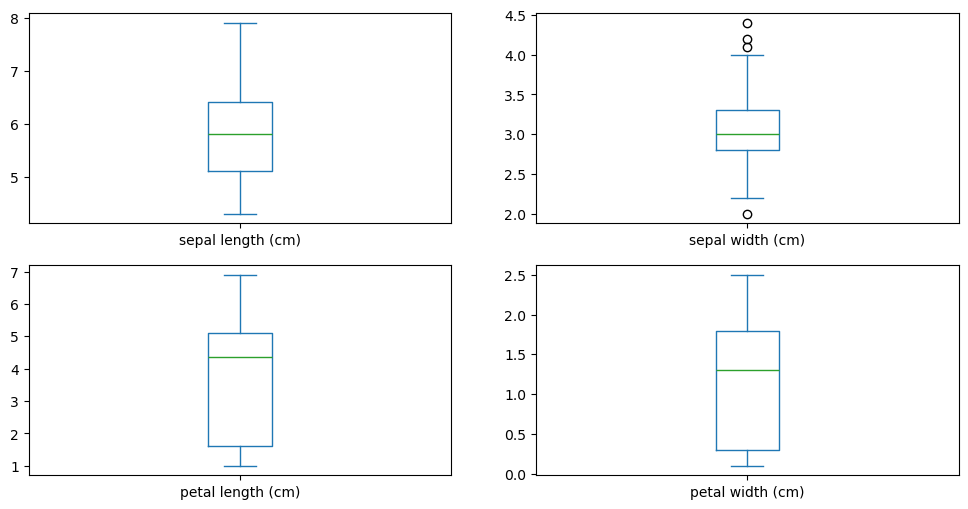

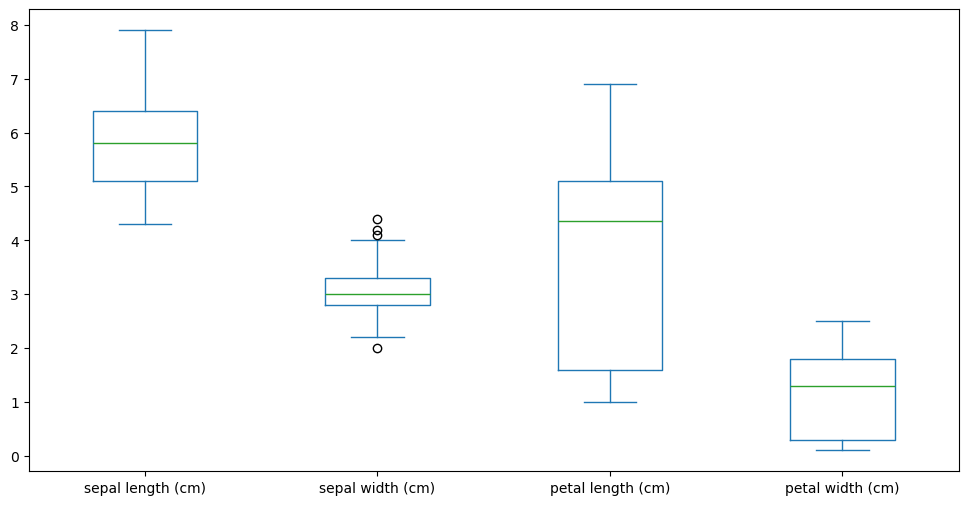

In [10]:
df.plot(kind="box", subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(12,6));
df.plot(kind="box", figsize=(12,6));

***Nhận Xét***
* Độ trải rộng giữa các tính chất khá khác nhau (sepal-width, sepal-length, petal-width, petal-length)
* Độ lệch của sepal-length, petal-length, petal-width theo hướng giá trị nhỏ.
* Phân bố giá trị của sepal-width khá cân bằng

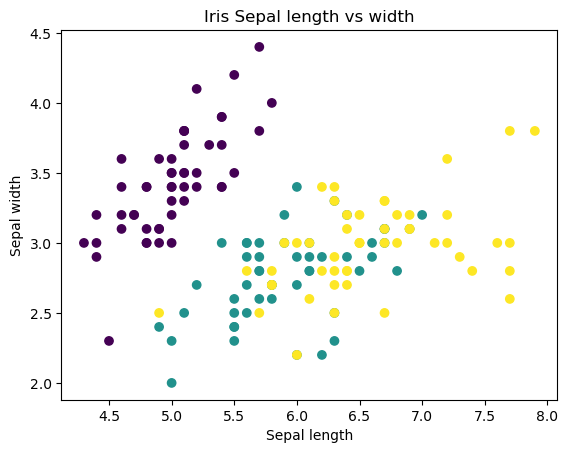

In [11]:
# Trực quan hóa dữ liệu
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Sepal length vs width')
plt.show()

***Nhận Xét***
* Loài iris-setosa có chiều dài đài hoa nhỏ hơn nhưng chiều rộng lớn hơn
* Versicolor nằm gần trung bình về cả chiều dài lẫn chiều rộng
* Virginica có chiều dài đài hoa lớn hơn và chiều rộng đài hoa nhỏ hơn

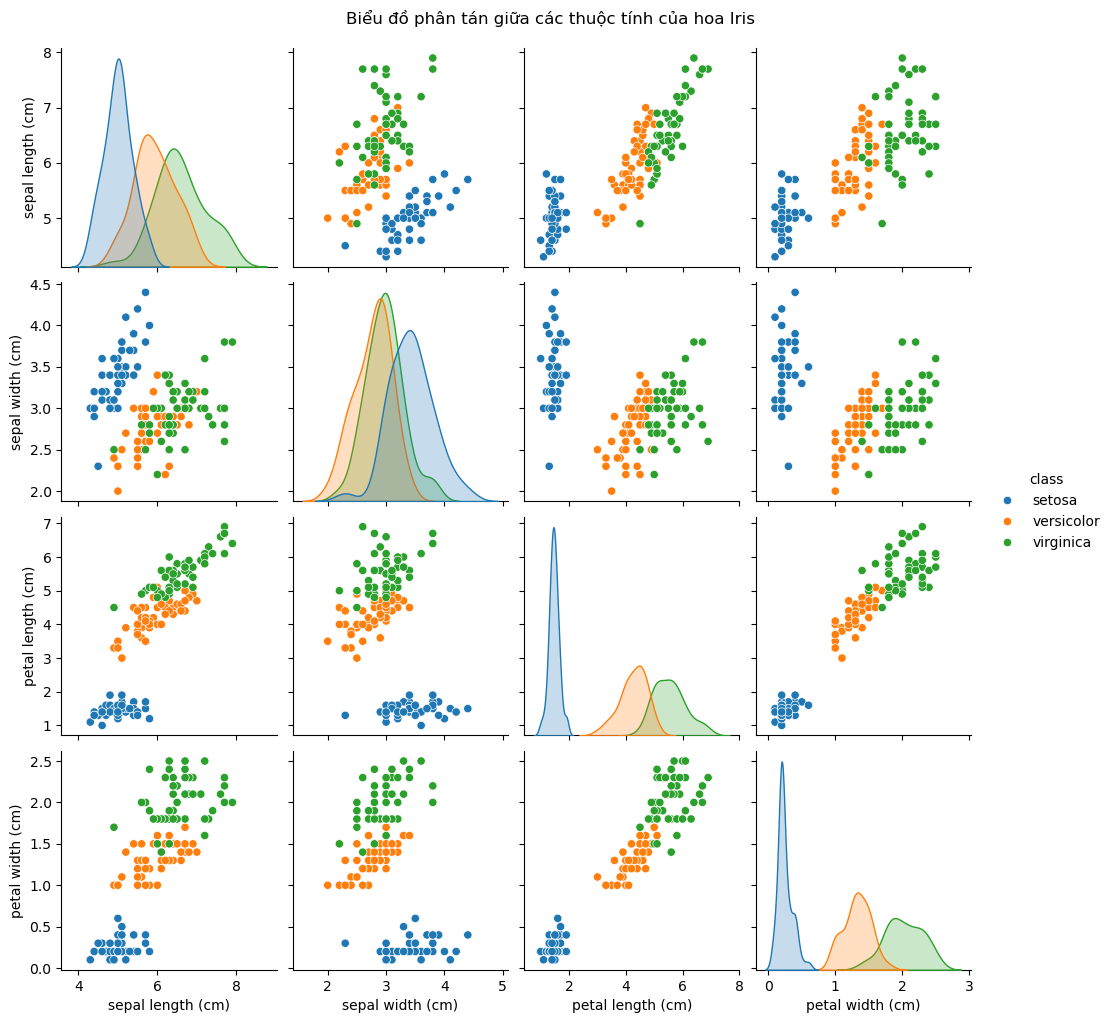

In [12]:
sns.pairplot(df, hue='class')
plt.suptitle("Biểu đồ phân tán giữa các thuộc tính của hoa Iris", y=1.02)
plt.show()

***Nhận Xét***
* setosa có cánh hoa nhỏ hơn đáng kể so với hai loài còn lại
* virginica có các số đo (cả đài hoa và cánh hoa) lớn hơn versicolor

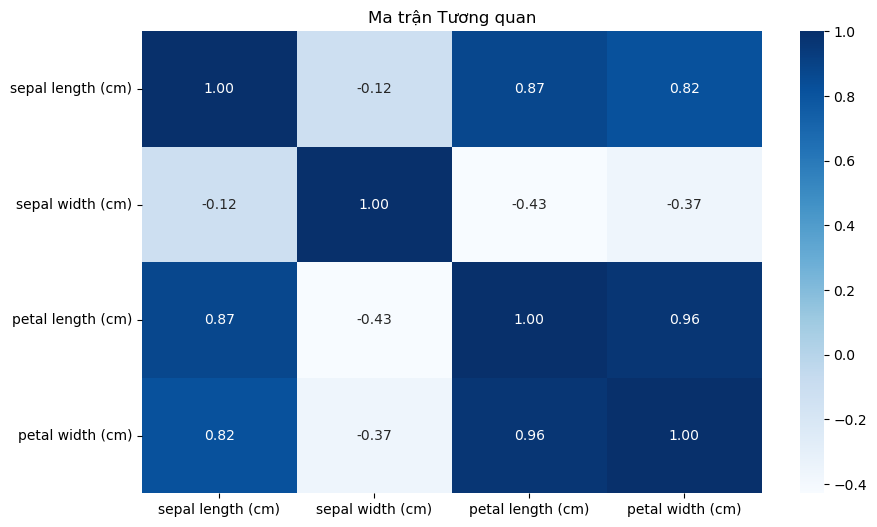

In [13]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt=".2f")
plt.title('Ma trận Tương quan')
plt.show()

***Nhận Xét***
* Các cặp tính chất có độ tương đồng cao:
    * (sepal-length, petal-length) = 0.87
    * (sepal-length, petal-width) = 0.82
    * (petal-length, petal-width) = 0.96

## 4. Tiền Xử Lý Dữ Liệu

***Xoá dữ liệu trùng***

In [14]:
if n_duplicated > 0:
    print("\nCác dòng trùng:")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))

    # Xóa dòng trùng (giữ lại dòng đầu tiên)
    df_clean = df.drop_duplicates()
    X = df_clean.iloc[:, :-1].values
    y = df_clean['class'].cat.codes.values
    print(f"\nSau khi xóa trùng: {len(df_clean)} mẫu")
else:
    print("Không có dòng trùng trong dataset")


Các dòng trùng:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
101                5.8               2.7                5.1               1.9   
142                5.8               2.7                5.1               1.9   

         class  
101  virginica  
142  virginica  

Sau khi xóa trùng: 149 mẫu


***Chuyển đổi kiểu dữ liệu danh mục thành dữ liệu số***

***Chia dữ liệu: 70% train, 30% test***
* random_state=42 để đảm bảo kết quả chia là cố định mỗi lần chạy

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("    Chia Dữ liệu")
print("\nSố lượng mẫu huấn luyện (train):", len(X_train))
print("\nSố lượng mẫu kiểm tra (test):", len(X_test))

    Chia Dữ liệu

Số lượng mẫu huấn luyện (train): 104

Số lượng mẫu kiểm tra (test): 45


In [16]:
X_train[:5]

array([[5.5, 2.4, 3.7, 1. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.8, 3.2, 5.9, 2.3],
       [6.6, 3. , 4.4, 1.4],
       [6.7, 2.5, 5.8, 1.8]])

***Chuẩn hoá dữ liệu***

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Khởi Tạo Mô Hình KNN

In [19]:
class KNearestNeighbors:
    """Cài đặt thuật toán K-Nearest Neighbors"""
    
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X_train, y_train):
        """Lưu dữ liệu training"""
        self.X_train = X_train
        self.y_train = y_train
        print(f"✓ Đã lưu {len(X_train)} mẫu training")
    
    def euclidean_distance(self, x1, x2):
        """Tính khoảng cách Euclidean"""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict_single(self, x):
        """Dự đoán cho 1 điểm dữ liệu"""
        # Tính khoảng cách đến tất cả điểm training
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Lấy k điểm gần nhất
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        
        # Voting: chọn label xuất hiện nhiều nhất
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
    def predict(self, X):
        """Dự đoán cho nhiều điểm dữ liệu"""
        predictions = [self.predict_single(x) for x in X]
        return np.array(predictions)

knn = KNearestNeighbors(k=3)
print(f"\n Khởi tạo mô hình KNN với k={knn.k}")

# Huấn luyện
knn.fit(X_train_scaled, y_train)
print("Hoàn thành huấn luyện!")

# Dự đoán
y_pred = knn.predict(X_test_scaled)
print("Hoàn thành dự đoán!")

# Đánh giá
accuracy = accuracy_score(y_test, y_pred)
print(f"\n📊 ĐỘ CHÍNH XÁC (ACCURACY): {accuracy * 100:.2f}%")


 Khởi tạo mô hình KNN với k=3
✓ Đã lưu 104 mẫu training
Hoàn thành huấn luyện!
Hoàn thành dự đoán!

📊 ĐỘ CHÍNH XÁC (ACCURACY): 100.00%


In [20]:
# Classification Report
print(f"\n📋 BÁO CÁO CHI TIẾT:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


📋 BÁO CÁO CHI TIẾT:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Kết Thúc